In [270]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.options.display.float_format = '{:.2f}'.format

In [271]:
sports_cars = pd.read_csv('Sports Cars.csv')
sports_cars.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [272]:
sports_cars.shape

(1007, 8)

In [273]:
sports_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [274]:
sports_cars['Price (in USD)'] = sports_cars['Price (in USD)'].apply(lambda x : x.replace(',', ''))
sports_cars.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4,710,568,2.7,298000


As we can see, some of the sports cars are electric and have non-numeric values for engine size, we can create columns for electric and hybrid to store this information.

In [275]:
sports_cars['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'Electric', '6.5', '3.7', 'Electric Motor',
       '2.5', '1.5 + Electric', '6.8', '8.4', nan, '6.6', '7', '1.7',
       '3.3', '-', '6.7', '1.8', 'Electric (tri-motor)', '5.5',
       'Electric (93 kWh)', 'Electric (100 kWh)', 'Hybrid (4.0)', '4.6',
       '3.6', '1.5', 'Hybrid', '5.7', '2.0 (Electric)', '4.0 (Hybrid)',
       '0', '6.4', '6.3', '2.3'], dtype=object)

In [276]:
def apply_lambda(col, l):
    sports_cars[col] = sports_cars[col].apply(l)


In [277]:
def replace_string(col,str1,str2):
    sports_cars[col] = sports_cars[col].apply(lambda x : str(x).replace(str1,'').replace(str2,''))

In [278]:
sports_cars['Electric'] = sports_cars['Engine Size (L)'].copy()
apply_lambda('Electric', lambda x : 'No' if 'Electric' not in str(x) else x)
apply_lambda('Electric', lambda x : re.sub('\d{1}\.\d{1}', '', x))
replace_string('Electric','+','')
apply_lambda('Electric', lambda x : x.lstrip())
apply_lambda('Electric', lambda x : x[1:-1] if x.startswith('(') and x.endswith(')') else x)
sports_cars['Electric'].unique()

array(['No', 'Electric', 'Electric Motor', 'Electric (tri-motor)',
       'Electric (93 kWh)', 'Electric (100 kWh)'], dtype=object)

In [279]:
sports_cars['Hybrid'] = sports_cars['Engine Size (L)'].copy()
apply_lambda('Hybrid', lambda x : 'No' if 'Hybrid' not in str(x) else 'Yes')
sports_cars['Hybrid'].unique()

array(['No', 'Yes'], dtype=object)

In [280]:
apply_lambda('Engine Size (L)', lambda x : x if len(str(x)) == 1 else re.search('\d{1}\.\d{1}', str(x)))
apply_lambda('Engine Size (L)', lambda x : x.group() if type(x) == re.Match else x)
replace_string('Engine Size (L)','-','')
sports_cars['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'None', '6.5', '3.7', '2.5', '1.5', '6.8',
       '8.4', '6.6', '7', '1.7', '3.3', '', '6.7', '1.8', '5.5', '4.0',
       '4.6', '3.6', '5.7', '2.0', '0', '6.4', '6.3', '2.3'], dtype=object)

In [281]:
replace_string('Horsepower',',','+')

In [282]:
replace_string('Torque (lb-ft)','-','+')
replace_string('Torque (lb-ft)',',','')

In [283]:
replace_string('0-60 MPH Time (seconds)','<','+')
sports_cars['0-60 MPH Time (seconds)'].unique()

array(['4', '2.8', '3', '3.2', '2.7', '3.1', '3.8', '3.5', '2.5', '2.4',
       '5.4', '4.4', '4.8', '4.7', '3.6', '4.1', '1.85', '4.5', '3.3',
       '3.9', '4.2', '3.4', '5.1', '4.3', '2.9', '5', '5.3', '4.9', '6.5',
       '3.7', '1.95', '1.9', '1.98', '2.6', '2.3', '4.6', ' 1.9', '1.8',
       '2.1', '5.2', '2.2', '6.4', '2'], dtype=object)

In [284]:
sports_cars

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Electric,Hybrid
0,Porsche,911,2022,3,379,331,4,101200,No,No
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390,No,No
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750,No,No
3,Audi,R8,2022,5.2,562,406,3.2,142700,No,No
4,McLaren,720S,2021,4,710,568,2.7,298000,No,No
...,...,...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,3000000,No,No
1003,Lotus,Evija,2021,None,1972,1254,2,2000000,Electric Motor,No
1004,McLaren,Senna,2021,4,789,590,2.7,1000000,No,No
1005,Pagani,Huayra,2021,6,764,738,3,2600000,No,No


In [285]:
sports_cars.iloc[:,3:8] = sports_cars.iloc[:,3:8].apply(pd.to_numeric, errors = 'coerce')
sports_cars

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Electric,Hybrid
0,Porsche,911,2022,3.00,379,331.00,4.00,101200,No,No
1,Lamborghini,Huracan,2021,5.20,630,443.00,2.80,274390,No,No
2,Ferrari,488 GTB,2022,3.90,661,561.00,3.00,333750,No,No
3,Audi,R8,2022,5.20,562,406.00,3.20,142700,No,No
4,McLaren,720S,2021,4.00,710,568.00,2.70,298000,No,No
...,...,...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5.00,1280,1106.00,2.50,3000000,No,No
1003,Lotus,Evija,2021,NaN,1972,1254.00,2.00,2000000,Electric Motor,No
1004,McLaren,Senna,2021,4.00,789,590.00,2.70,1000000,No,No
1005,Pagani,Huayra,2021,6.00,764,738.00,3.00,2600000,No,No


In [286]:
sports_cars.describe()

,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
count,1007.00,952.00,1007.00,1003.00,1007.00,1007.00
mean,2021.20,4.39,657.98,559.57,3.51,382035.94
std,2.02,1.40,593.02,441.38,0.78,738322.72
min,1965.00,0.00,181.00,0.00,1.80,25000.00
25%,2021.00,3.50,454.00,406.00,2.90,71800.00
50%,2021.00,4.00,591.00,509.00,3.50,140000.00
75%,2022.00,5.20,708.50,604.00,4.00,250000.00
max,2023.00,8.40,10000.00,10000.00,6.50,5200000.00


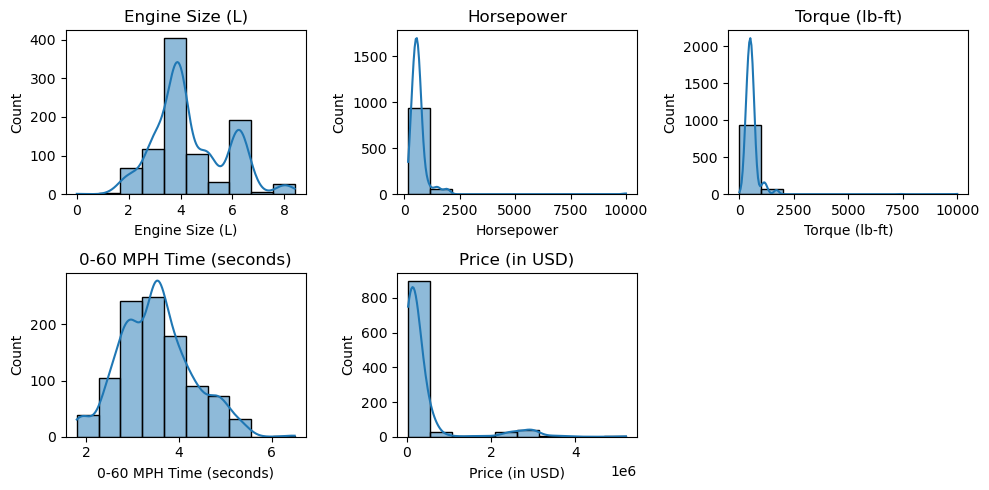

In [287]:
features = ['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)','0-60 MPH Time (seconds)','Price (in USD)']
plt.figure(figsize=(10, 5))
for feature in features:
    plt.subplot(2, 3, features.index(feature) + 1)
    sns.histplot(data=sports_cars[feature], bins=10, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

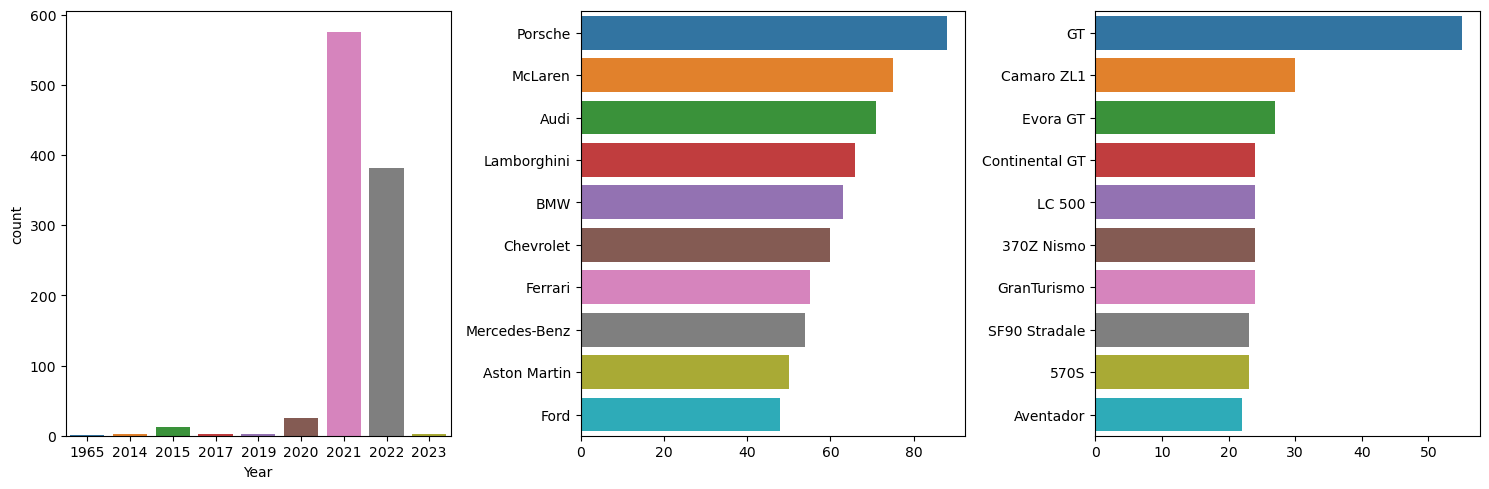

In [289]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.countplot(x = 'Year',data = sports_cars)

plt.subplot(1,3,2)
top_car_makes = sports_cars['Car Make'].value_counts().head(10)
sns.barplot(x = top_car_makes.values,y = top_car_makes.index)

plt.subplot(1,3,3)
top_car_models = sports_cars['Car Model'].value_counts().head(10)
sns.barplot(x = top_car_models.values,y = top_car_models.index)

plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='Hybrid', ylabel='Price (in USD)'>

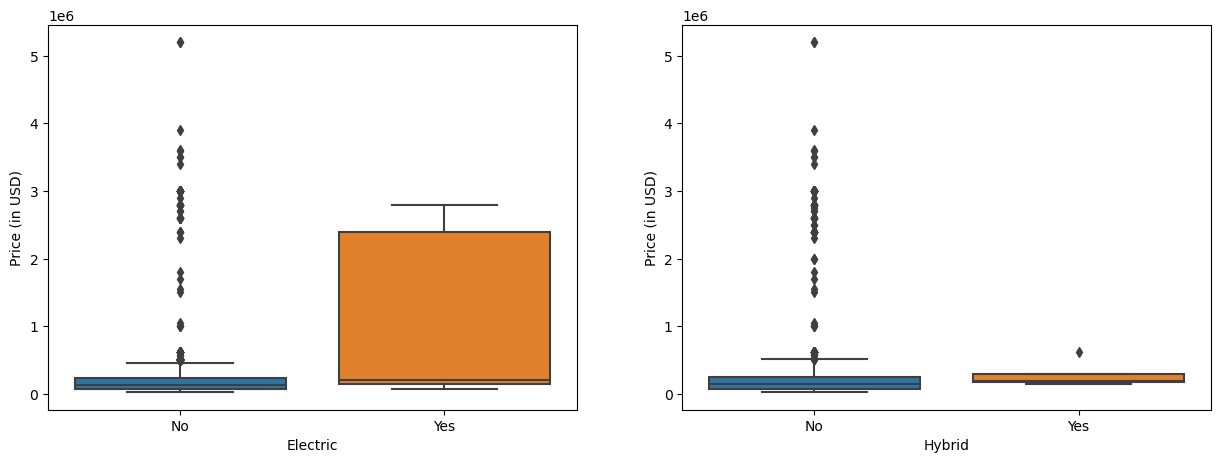

In [290]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
electric = sports_cars['Electric'].copy()
electric = electric.apply(lambda x : 'Yes' if x != 'No' else x)
sns.boxplot(x = electric, y = sports_cars['Price (in USD)'])

plt.subplot(1,2,2)
hybrid = sports_cars['Hybrid'].copy()
hybrid = hybrid.apply(lambda x : 'Yes' if x != 'No' else x)
sns.boxplot(x = hybrid, y = sports_cars['Price (in USD)'])

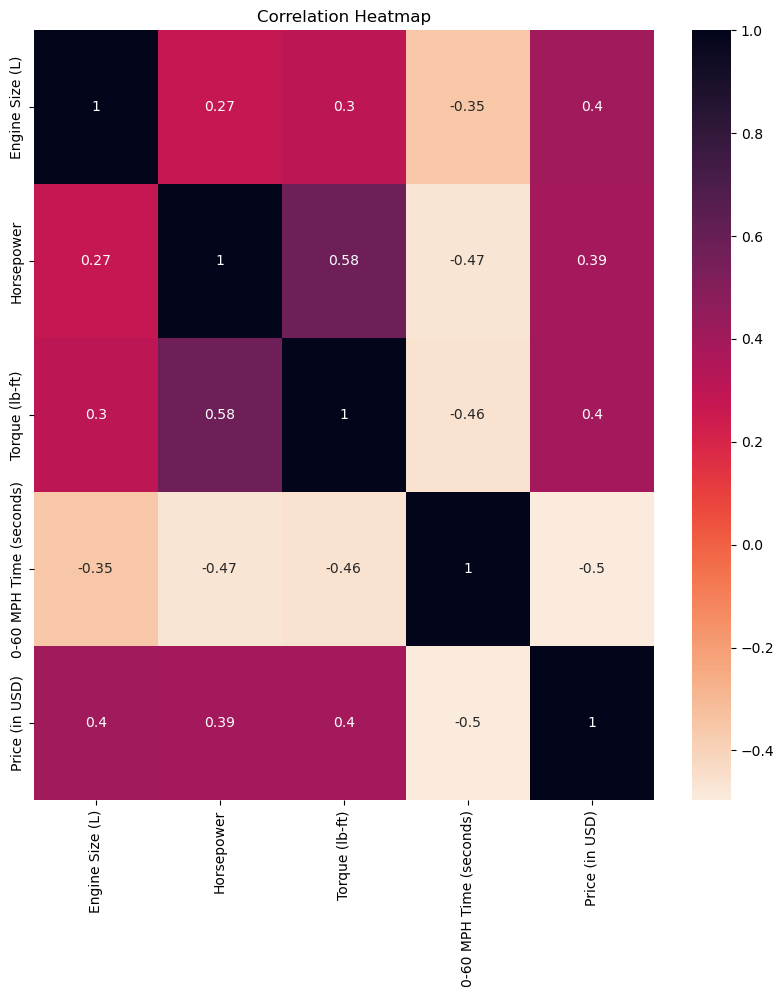

In [342]:
plt.figure(figsize=(10, 10))
sns.heatmap(sports_cars[features].corr(), annot=True, cmap='rocket_r')
plt.title('Correlation Heatmap')
plt.show()